<small><i>Dit document bevat een voorbeeld van het uitwerken van een datascience opdracht.</i></small>


# Verwachte aantal studenten
Een onderzoek naar het verwacht aantal studenten bij de opleiding HBO-ICT te Utrecht voor de jaren 2017, 2018 en 2019.

Auteur: D.O. Cent

Datum: 01/02/2017

## Opdracht
De opdracht is het bepalen van het verwachte aantal studenten van de opleiding HU HBO-ICT voor de komende drie jaar.
### Aanleiding
De reden om deze opdracht te verstrekken is dat het management een inschatting wil maken over het aantal benodigde docenten. Jaarlijks moet hiervan een drie jarige planning aan de directie verstrekt worden.
### Doelstelling
De doelstelling is om de verwachte aantallen studenten voor de komende drie jaar zo nauwkeurig mogelijk te bepalen. Basis voor deze cijfers zijn de cijfers van landelijke aantallen studenten van de afgelopen vijf jaar. Er mag vanuit gegaan worden dat landelijke trend aan HBO-ICT studenten ook geldt voor de opleiding HBO-ICT te Utrecht. 
### N.B. Aanname
<i>De aanname bij deze opdracht is dat er bij de HBO-ICT alleen over het jaar 2014 cijfers van aantallen studenten bekend zijn. De voorgaande jaren worden als niet bekend verondersteld. Dit is niet de werkelijkheid.</i>

## Data verzamelen
Om de opdracht uit te voeren zijn de volgende gegevens nodig:
- Landelijke studentencijfers van de afgelopen vijf jaar.
- Het aantal HBO-ICT studenten op het startmoment.

### Landelijke studentencijfers
De landelijke cijfers van aantallen studenten worden verzameld door het CBS: http://statline.cbs.nl/Statweb. Uit de verzameling "Hoger onderwijs; ingeschrevenen, studierichting, leeftijd" is het CSV bestand: `HO-inschrijvingen.csv` aangemaakt.

### Aantal HBO-ICT studenten
Het aantal HBO-ICT studenten van het leerjaar 2014 is: **1629** (Volgens opgave van van de studentenadminstratie)

In [12]:
# Vastellen startcijfer HBO-ICT
hboict2014 = 1629

## Data bewerken
De aangeleverde gegevens in het CSV databestand dienen omgevormd te worden tot een bruikbare vorm: een dataframe.

<small><i>Hiervoor maken we gebruik van de Python Pandas bibliotheek.</i></small>

Een eerste inventarisatie van het bestand met notepad++ toont ons:

Hieruit is te halen dat de relevante gegevens zich op rij 6: Perioden en rij: 10 bevinden. Ook zien we dat het scheidingsteken tussen de gegevens een puntkomma (;) is en dat elk gegeven voorzien is van quotes. 


In [2]:
import pandas as pd

In [3]:
# read csv file
# zie: http://pandas.pydata.org/pandas-docs/version/0.17.0/io.html#io-read-csv-table
df = pd.read_csv('introductie_HBO-ICT.csv', sep=";", quoting=1, quotechar='"', skiprows=[0,1,2,3,4,6,7,8], header=None, engine='python')

# Tonen van de ingelezen inhoud:
df

,0,1,2,3,4,5,6
0,Perioden,2010/'11,2011/'12,2012/'13,2013/'14,2014/'15,2015/'16*
1,Waarde,19188,20449,21498,23509,25128,-


### Data Mungling

De ingelezen data moeten nu omgevormd worden naar een bruikbaar formaat: per jaartal het aantal inschrijvingen.

In [4]:
# alleen de kolommen 1 t/m 5 overnemen:
df = df[[1,2,3,4,5]]
# Rijen en kolommen verwisselen:
df = df.T
# Kolomnamen wijzigen:
df.columns=['Jaar','Aantal']
# Jaar: omvormen naar jaartal
df['Jaar'] = df['Jaar'].str[0:4]
# Jaar: omvormen naar numerieke waarde
df['Jaar'] = df['Jaar'].astype(int)
# Aantal: omvormen naar numerieke waarde
df['Aantal'] = df['Aantal'].astype(int) 
# toon omgevormde waarde
df

,Jaar,Aantal
1,2010,19188
2,2011,20449
3,2012,21498
4,2013,23509
5,2014,25128


## Data analyseren
Allereerst maken we een kleine analyse van de cijfers. Hiervoor berekenen we o.a. het gemiddelde.

In [5]:
df.describe()[['Aantal']]

,Aantal
count,5.000000
mean,21954.400000
std,2377.815026
min,19188.000000
25%,20449.000000
50%,21498.000000
75%,23509.000000
max,25128.000000


In bovenstaande lijst zien we o.a. dat er 5 meetwaarden zijn en wat het gemiddelde (mean) en standaarddeviatie (std) is.


Om meer inzicht te krijgen in de data geven we deze eerst in grafiekvorm weer.

<small><i>Hiervoor maken we gebruik van Python Matplotlib bibliotheek</i></small>

In [6]:
# importeren van de plot bibliotheek
import matplotlib.pyplot as plt

# laat de output verschijnen in het notebook
%matplotlib inline

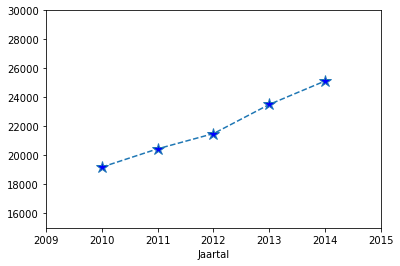

In [7]:
# Opbouwen van de grafiek

# X as lablel
plt.xlabel('Jaartal')
# minimale en maximale X-as waarde
plt.xlim(2009, 2015)
# minimale en maximale Y-as waarde
plt.ylim(15000, 30000)

# Tonen van de grafiek
plt.plot(df['Jaar'],df['Aantal'], linestyle='--',
        marker='*', markerfacecolor='blue', markersize=12)

In de grafiek zien we dat er jaarlijks een kleine toename is van het aantal studenten.


## Data modelleren
Vanuit de data per jaar van de jaren 2010 t/m 2014 willen een formule hebben waarmee we kunnen voorspellen wat de aantallen studenten zouden kunnen zijn in 2016, 2017 en 2018 als er verder geen veranderingen optreden.

Een methode die dit kan heet regressie. Omdat er hier sprake is van maar 1 variable (JAAR) en 1 uitkomst (AANTAL) wordt dit ook wel "simpel regression" genoemd. Omdat er sprake is van een vrijwel rechte lijn tussen de punten kunnen we gebruik maken van lineaire regressie.

Deze methode is aanwezig in de scikit-learn bibliotheek.

TODO: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb 



In [8]:
# importeer de bibliotheek
from sklearn import linear_model

# Scikit-learn verwacht alleen nummerieke waarden, dus Jaar ook omzetten
df['Jaar'] = df['Jaar'].astype(int)

# Scikit-learn verwacht 1 of meerdere variabelen in de vorm van een dataframe:
X = df[['Jaar']]

# Scikit-learn verwacht de uitkomstwaarden als lijst
y = df.Aantal

# Scikit-learn: maken van het lineare regressie model
lm = linear_model.LinearRegression()
# berekenen van de formule
lm.fit(X, y)

# bepaling van de coëefficiënten van de formule
constante = lm.intercept_
jaarfactor = lm.coef_[0]

print('De formule is: Aantal leerlingen = {0:.1f} + {1:.1f} * Jaartal '.format(constante,jaarfactor))


ModuleNotFoundError: No module named 'sklearn'

### Controle
De formule controleren we op een waarde.
Hierna bepalen we de foutenmarge van de formule uit de berekende waarden ten opzichte van de werkelijke waarde.

In [ ]:
# Controle voor 2010

# werkelijke waarde van 2010
werk2010 = df.loc[1]['Aantal']
# berekene waarde in 2010
ber2010 = constante + (jaarfactor * 2010)

#afdrukken
print('Controle voor 2010: {0:.0f}'.format(ber2010) )
print('Dit ligt heel dicht bij de werkelijke waarde: {0:.0f}'.format(werk2010))
print('')

# Controle van de fout (R-Squared)
score = lm.score(X, y)
print("De score van {0:.3f} (op een maximum van 1.0) geeft aan dat de formule nauwkeurig is.".format(score,100.0*score))

### Voorspellen
Vanuit de formule kunnen we nu een voorspelling doen voor de jaren voorbij 2014.

Deze controleren we dan met behulp van een grafiek.


In [9]:
# bepaal een voorspelling
jaren = {'Jaar' : [ 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

pX = pd.DataFrame(jaren)

voorspelling = lm.predict(pX)

NameError: name 'lm' is not defined

NameError: name 'voorspelling' is not defined

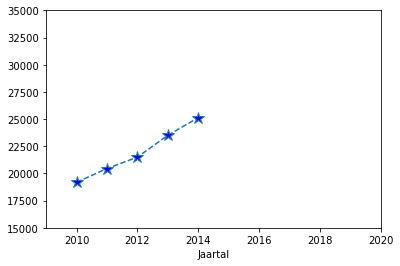

In [10]:
# Controle met grafiek
plt.xlabel('Jaartal')
plt.xlim(2009, 2020)
plt.ylim(15000, 35000)
plt.plot(df['Jaar'],df['Aantal'], linestyle='--',
        marker='*', markerfacecolor='blue', markersize=12)
plt.plot(pX['Jaar'],voorspelling,
        marker='.', markerfacecolor='red', markersize=12)

# plt.savefig("pic/lineaire_regressie.png")

We zien dat de voorspellingslijn (in groen) dichtbij de werkelijke waarden van 2010 t/m 2014 liggen

### Berekening HBO-ICT
De volgende stap is dat we de voorspelling voor HBO ICT gaan maken


In [11]:
# bepaling van de verhouding tussen tussen landelijk en HBO-ICT
land2014 = df.loc[5]['Aantal']
verhouding = hboict2014 / land2014

print('Uitgaande van het aantal studenten in 2014: {} '.format(hboict2014 ))
print('zijn de voorspelde waarden voor HBO ICT:')
for i in range(7, 10):
    print('Jaar {0}: {1:.0f} studenten'.format(i+2010, voorspelling[i]*verhouding))

print('Onder de voorwaarde dat de landelijke trend zoals deze in de 2010 t/m 2014 zich onverminderd voortzet')
print('en dat deze trend exact van toepassing is op de HBO ICT.')

Uitgaande van het aantal studenten in 2014: 1629 
zijn de voorspelde waarden voor HBO ICT:


NameError: name 'voorspelling' is not defined

<b> Einde </b>